In [23]:
import numpy as np
import rasterio
from rasterio.plot import show
import os
import matplotlib.pyplot as plt
import rioxarray
import tifffile
from PIL import Image

In [24]:
def plot_band_distro(red_channel, green_channel, blue_channel, nir_channel,bin_size=5):
    # Import necessary libraries
    import matplotlib.pyplot as plt

    # Create a new figure
    plt.figure(figsize=(14, 10))

    # Plot histogram for each channel
    plt.subplot(2, 2, 1)
    plt.hist(red_channel.ravel(), bins=bin_size, color='red', alpha=0.7)
    plt.title('Red Channel')

    plt.subplot(2, 2, 2)
    plt.hist(green_channel.ravel(), bins=bin_size, color='green', alpha=0.7)
    plt.title('Green Channel')

    plt.subplot(2, 2, 3)
    plt.hist(blue_channel.ravel(), bins=bin_size, color='blue', alpha=0.7)
    plt.title('Blue Channel')

    plt.subplot(2, 2, 4)
    plt.hist(nir_channel.ravel(), bins=bin_size, color='purple', alpha=0.7)
    plt.title('Near-Infrared (NIR) Channel')

    # Show the plots
    plt.tight_layout()
    plt.show()

In [25]:
from skimage import exposure, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
#  maps the intensity values in grayscale image I to new values in J. By default, imadjust saturates the bottom 1% and the top 1% of all pixel values.
def imadjust(image,threshold=5):
   # Assuming 'image' is your grayscale or RGB image
   # Convert the image to unsigned byte format
   print(image.shape)
   height, width = image.shape
   image = img_as_ubyte(image)
   
   # Create a masked array ignoring zeros and values greater than threshold
   masked_image = np.ma.masked_less(image, threshold)
   # Compute the lower and upper percentiles
   v_min, v_max = np.percentile(masked_image.compressed(), (1, 99))
   
   
   # Use the contrast stretching function from skimage
   image_rescale = exposure.rescale_intensity(image, in_range=(v_min, v_max))
   # plot shape
   image_rescale = image_rescale.reshape(height, width)
   print(image_rescale.shape)
   
   return image_rescale

In [26]:

ortho_file = '/home/tiago/workspace/deep-segmentation/dataset/soil_classification/planet_cutted.tif'

if os.path.isfile(ortho_file):
    NameError("Path Does not exist!")

image = tifffile.TiffFile(ortho_file).asarray()

metadata = tifffile.TiffFile(ortho_file).pages[0].tags
print(metadata)

TiffTag 256 ImageWidth @10 SHORT @18 6579
TiffTag 257 ImageLength @22 SHORT @30 6856
TiffTag 258 BitsPerSample @34 SHORT[4] @206 (32, 32, 32, 32)
TiffTag 259 Compression @46 SHORT @54 NONE
TiffTag 262 PhotometricInterpretation @58 SHORT @66 MINISBLACK
TiffTag 273 StripOffsets @70 LONG[6856] @27638 (55242, 160506, 265770, 371034,
TiffTag 277 SamplesPerPixel @82 SHORT @90 4
TiffTag 278 RowsPerStrip @94 SHORT @102 1
TiffTag 279 StripByteCounts @106 LONG[6856] @214 (105264, 105264, 105264, 10526
TiffTag 284 PlanarConfiguration @118 SHORT @126 CONTIG
TiffTag 338 ExtraSamples @130 SHORT[3] @55062 ('UNSPECIFIED', 'UNSPECIFIED', 'U
TiffTag 339 SampleFormat @142 SHORT[4] @55068 ('IEEEFP', 'IEEEFP', 'IEEEFP', 'I
TiffTag 33550 ModelPixelScaleTag @154 DOUBLE[3] @55076 (3.0, 3.0, 0.0)
TiffTag 33922 ModelTiepointTag @166 DOUBLE[6] @55100 (0.0, 0.0, 0.0, 481698.0,
TiffTag 34735 GeoKeyDirectoryTag @178 SHORT[32] @55148 (1, 1, 0, 7, 1024, 0, 1,
TiffTag 34737 GeoAsciiParamsTag @190 ASCII[30] @55212 WGS 

In [27]:
normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
# Convert the data type to uint8
image = normalized_image.astype(np.uint8)

In [28]:
# Extract individual channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]
nir_channel = image[:, :, 3]

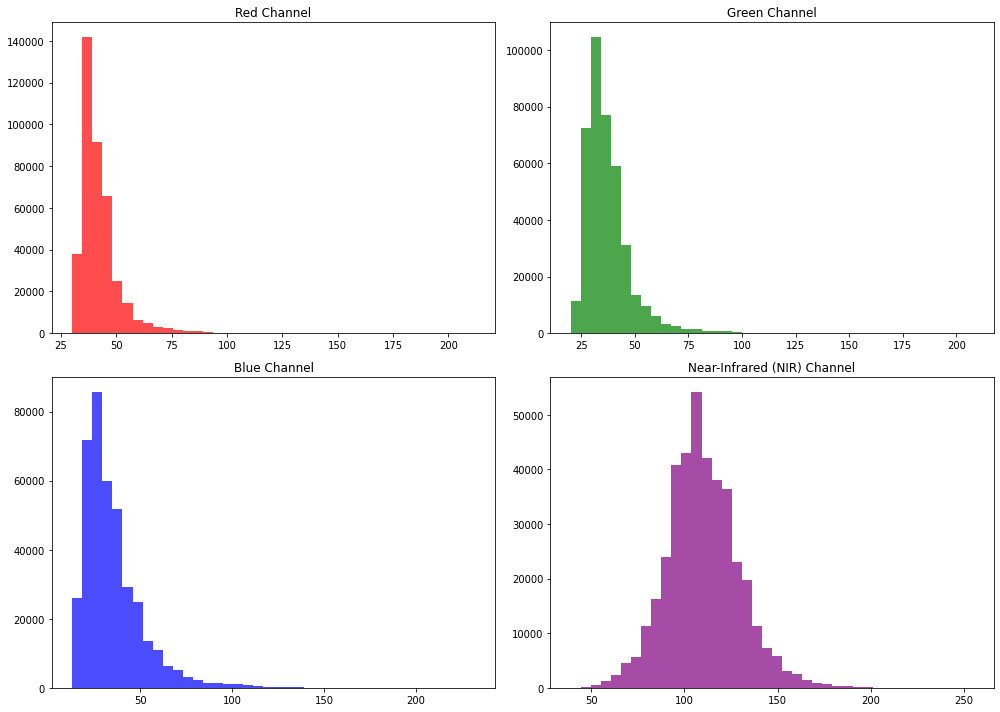

In [29]:
# remove zeros
plot_red = red_channel[red_channel != 0]
plot_green = green_channel[green_channel != 0]
plot_blue = blue_channel[blue_channel != 0]
plot_nir = nir_channel[nir_channel != 0]

plot_band_distro(plot_red, plot_green, plot_blue, plot_nir,bin_size=40)



In [30]:
red_channel = imadjust(red_channel)
blue_channel = imadjust(blue_channel)
green_channel = imadjust(green_channel)
nir_channel = imadjust(nir_channel)



(6856, 6579)
(6856, 6579)
(6856, 6579)
(6856, 6579)
(6856, 6579)
(6856, 6579)
(6856, 6579)
(6856, 6579)


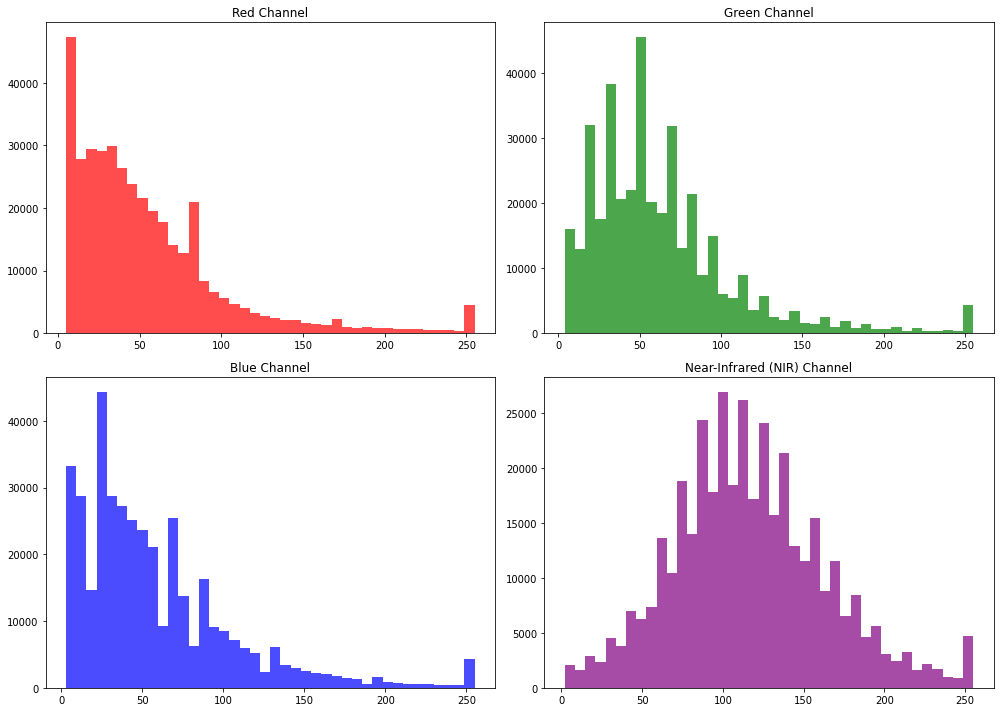

In [31]:

# remove zeros
plot_red = red_channel[red_channel != 0]
plot_green = green_channel[green_channel != 0]
plot_blue = blue_channel[blue_channel != 0]
plot_nir = nir_channel[nir_channel != 0]

plot_band_distro(plot_red, plot_green, plot_blue, plot_nir,bin_size=40)


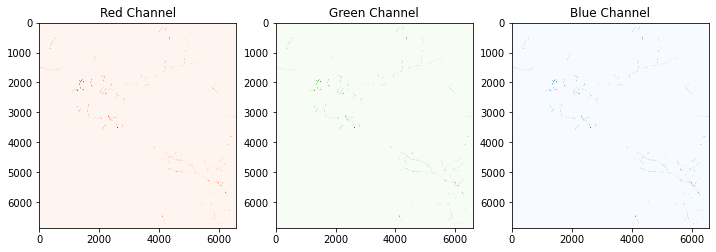

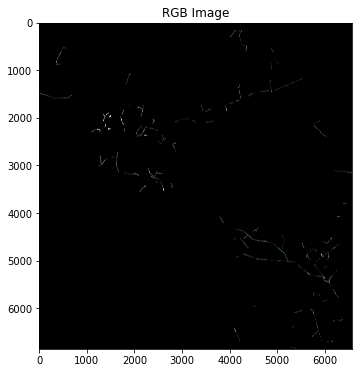

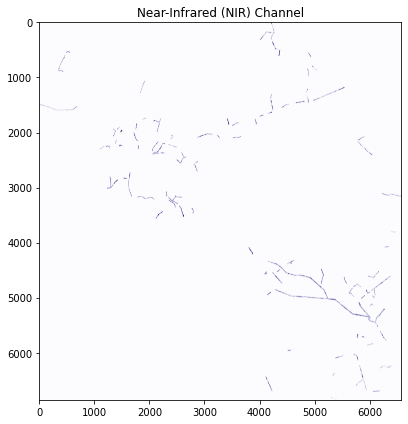

In [32]:
# Plot RGB channels
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title('Red Channel')
axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title('Green Channel')
axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title('Blue Channel')

# plot RGB in one image
fig, ax = plt.subplots(figsize=(6, 6))

# build the image
en_image = np.dstack((red_channel, green_channel, blue_channel))
# convert to uint8
file_name = ortho_file.split('.')[0].split('/')[-1]
en_image = en_image.astype(np.uint8)
import PIL
PIL.Image.fromarray(en_image).convert('RGB').save(f'{file_name}.png')


ax.imshow(en_image)
ax.set_title('RGB Image')

# Plot NIR channel
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(nir_channel, cmap='Purples')
ax.set_title('Near-Infrared (NIR) Channel')

# Show the plots
plt.tight_layout()
plt.show()


DSM Files